# LHCb Startertalk on Uncertainties

## What is an uncertainty, really?

We write $a = 3 \pm 0.5$, where 0.5 is the *standard error* (jargon: "error" = uncertainty).

What does this truely mean?

a) The true value given by nature is 3, but when we measure it, it fluctuates (e.g. Heisenberg uncertainty principle).

b) I made an experiment and this expresses my belief that the value is most likely 3 and is located within the interval 2.5 to 3.5 with 68 % probability. This is based on the data that I recorded and my initial assumption that the value of $a$ is positive.

c) Someone made an experiment and their estimate for the true value of $a$ based on the data is 3. The interval (2.5, 3.5) contains the true value with 68 % probability.

* a) Is nonsense, but b) and c) are valid interpretations
* In HEP, we generally mean c), because we compute uncertainties based on the Frequentist school of statistics
* b) follows from the Bayesian school of statistics
* In b) or c), what does "68% probability" really mean in each context?

## Statistical and systematic uncertainties

* Either type can be correlated or uncorrelated


* Statistical uncertainty
    * Origin: We use finite sample instead of infinite distribution
    * Goes down as simple size increases
    * Example
        * Arithmetic mean $\hat \mu = \frac 1N\sum_i x_i$
        * Error of mean $\hat{V}[\hat \mu] = \frac 1 {N(N - 1)}\sum_i (x_i - \hat \mu)^2$
    * We have reliable standard recipes to calculate these


* Systematic uncertainty
    * Origin: Imperfect appartus or technique, deviations of reality from simplified models
    * Quantifies potential mistakes in analysis
    * Does not go down as sample size increases
    * Correlated examples
        * Real-life: Measured the length of ten shoes with ruler than has factory tolerance of 0.1mm (correlated)
        * LHCb: Measured cross-sections with value of luminosity that has uncertainty of 1-2%
    * Uncorrelated examples
        * Real-life: ???
        * LHCb: Measured momentum of particle in LHCb differs from true momentum $\sigma_p/p \approx 0.5\!-\!1\%$ 
    * Not well covered in statistics books, but some proper theoretical results available
    * Many misconceptions


* Statistical errors can be systematic errors
    * Depends on context
    * Statistical error of parameter in control study is systematic error in main study
    * Example: LHCb performs calibration measurements to determine tracking and PID efficiencies
        * Statistical errors in calibration measurements are systematic errors in main measurement

## Statistical uncertainties: Basic concepts

We need to distinguish between *true value*, *estimator*, and *estimate (or estimated value)*.

* Real-valued sample $x$ drawn from distribution $F$
* All samples $x_i$ drawn from $F(x)$ are independent and identically distributed (iid)
* Sample values $x_i$ occur with (differential) probability $d P(x) = d F(x) = f(x) dx$
    * $f(x)$ probability density function (pdf)
    * $F(x)$ cumulative density function (cdf)
* Sloppy: will refer to $f(x)$ and $F(x)$ as the distribution

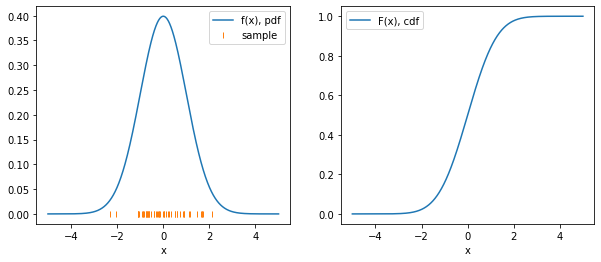

In [1]:
# Example: standard normal distribution ("Gaussian")

from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(-5, 5, 1000)
fx = norm.pdf(x)
Fx = norm.cdf(x)

sample = norm.rvs(size=50, random_state=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
ax[0].plot(x, fx, label="f(x), pdf")
ax[0].set_xlabel("x")
ax[0].plot(sample, np.zeros_like(sample), "|", label="sample")
ax[1].plot(x, Fx, label="F(x), cdf")
ax[1].set_xlabel("x")
for axi in ax:
    axi.legend()

* Distribution usually depends on parameters that we are interested in
* Normal distribution depends on parameters $\mu, \sigma$ (location, width)
* Notation: $f(x; \mu, \sigma)$, semicolon separates random variable from parameters
* In general, $x$ can be a vector and parameters can be written as vector, too:  $f(\vec x; \vec a)$

### Estimation
* Estimation is statistician speak for "measurement"
* We have sample $\{ x_i \}$ which is distributed according to $f(x; a)$, where $a$ is unknown
* Estimator $h[x]$ maps data sample to estimate $\hat a$ of $a$
    * Notation: $h[x]$ estimator maps sample $\{ x_i \}$ to value, $f(x)$ is function that maps value to value 
* Examples of estimators of the location of a distribution
    * Arithmetic mean $h_1[x] = \frac 1N \sum_i x_i$
    * Sample median $h_2[x]$: Sort $x_i$, pick value in the middle
    
* Specific example:
    * We know that sample has normal distribution
    * True values $\mu$ and $\sigma$ are unknown
        * $\mu$ is parameter of interest
        * $\sigma$ is not of interest, a *nuisance parameter*



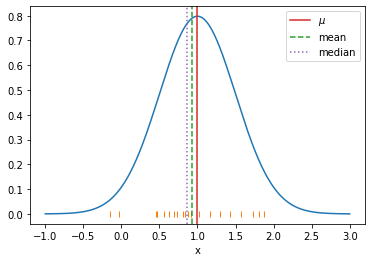

In [2]:
# Example: normal distribution with true value mu=1, sigma=0.5

from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

# true values (unknown)
mu = 1
sigma = 0.5

# distribution known, except for parameter values
dist = norm(mu, sigma)

x = np.linspace(-1, 3, 1000)

fx = dist.pdf(x)
sample = dist.rvs(size=20, random_state=1)
est1 = np.mean(sample)
est2 = np.median(sample)

plt.plot(x, fx)
plt.xlabel("x")
plt.plot(sample, np.zeros_like(sample), "|")
plt.axvline(mu, label="$\mu$", color="C3")
plt.axvline(est1, ls="--", label="mean", color="C2")
plt.axvline(est2, ls=":", label="median", color="C4")
plt.legend();

### Optimal estimators

* Many kinds of estimators, some better than others
* We want **optimal** estimators
* Some desirable properties
    * As close to true value as possible (we come back to that)
    * Easy to compute and/or easy to apply to any problem
    * Robustness against outliers
* In HEP, we mainly use
    * Maximum-likelihood estimator (MLE)
    * Plug-in estimator
    * Bootstrap estimator (meta estimator)

###  How far away is estimate from true value?

* Depends on estimator, sample size, distribution
* Almost magic: accuracy of estimator can be also estimated from sample!
* Define "close to true value"
    * In experiment, we have sample $\{ x_i \}$ with size $N$ and obtained estimate $\hat a = h[x]$
    * Sample $\{ x_i \}$ is random and so is estimate $\hat a$
    * If experiment were repeated $K$ times, we would get sample of estimates $\{ \hat a_1, \hat a_2, \dots, \hat a_K \}$
    * Quantify properties of this sample to describe accuracy of estimator with bias and variance estimates
        * Bias: $\hat B[\hat a] = \frac1K \sum_i (\hat a_i - a)$
        * Variance: $\hat V[\hat a] = \frac1K\sum_i (\hat a_i - a)^2$
* Example for a biased estimator: if true mean $\mu$ is unknown, variance estimate $\hat V[x] = \frac1N\sum_i (x_i - \hat\mu)^2$ is biased

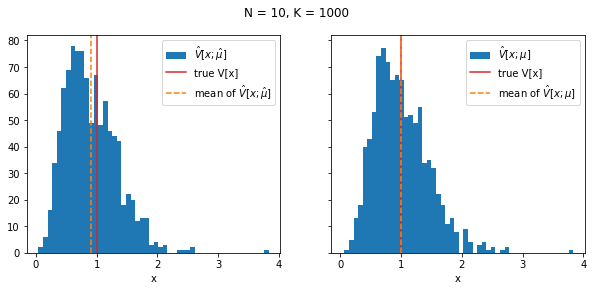

In [77]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

# true values (unknown)
mu = 1
sigma = 1

dist = norm(mu, sigma)

K = 1000
N = 10
var_1 = []
var_2 = []
for k in range(K):
    sample = dist.rvs(size=N, random_state=k+1)
    hat_mu = np.mean(sample)
    v1 = np.mean((sample - np.mean(sample)) ** 2)
    v2 = np.mean((sample - mu) ** 2)
    var_1.append(v1)
    var_2.append(v2)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))
fig.suptitle(f"N = {N}, K = {K}")
ax[0].hist(var_1, bins=50, label="$\hat V[x; \hat \mu]$");
ax[1].hist(var_2, bins=50, label="$\hat V[x; \mu]$");
for axi in ax:
    axi.axvline(sigma ** 2, color="C3", label="true V[x]")
ax[0].axvline(np.mean(var_1), color="C1", ls="--", label="mean of $\hat V[x; \hat \mu]$")
ax[1].axvline(np.mean(var_2), color="C1", ls="--", label="mean of $\hat V[x; \mu]$")
for axi in ax:
    axi.set_xlabel("x")
    axi.legend()

* Perhaps surprising that $\hat V[x; \hat \mu]$ is biased although $\hat \mu$ is an unbiased estimate of $\mu$
* Bias caused by two effects
    * Neglected correlation between $\hat V[x; \hat \mu]$ and $\hat \mu$
    * $\hat V[x; \hat \mu]$ is non-linear function of $\hat\mu$
* In this case, simple well-known bias correction: $\frac N{N-1}\hat V[x; \hat \mu]$ is unbiased (for derivation see e.g. F. James book (references at end))

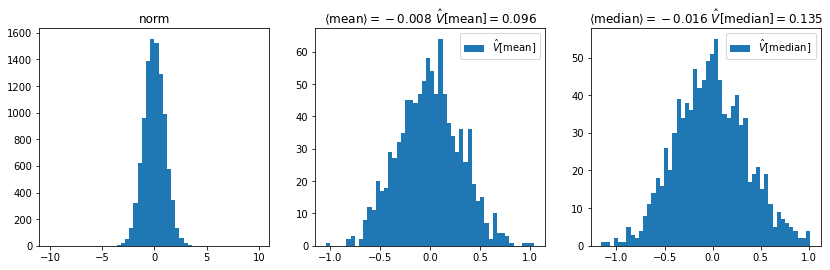

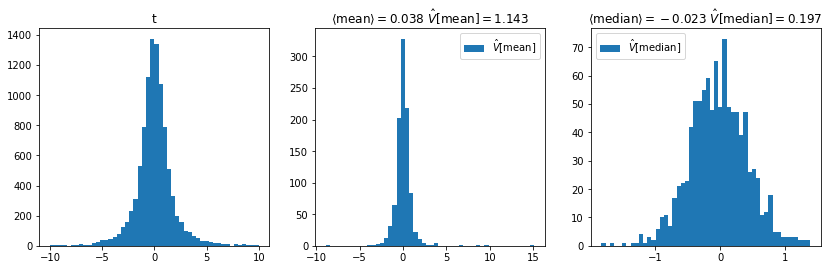

In [73]:
# Example for variance of estimator: variance of mean and median for normal and exponential

from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm, t

mu = 0
sigma = 1

dist = {
    "norm": norm(mu, sigma),
    "t": t(2, mu, sigma),
}

K = 1000
N = 10
for dkey, d in dist.items():
    est = {"mean": [], "median": []}
    all_samples = []
    for k in range(K):
        sample = d.rvs(size=N, random_state=k+1)
        est["mean"].append(np.mean(sample))
        est["median"].append(np.median(sample))
        all_samples.append(sample)

    fig, ax = plt.subplots(1, 3, figsize=(14, 4))
    ax[0].hist(np.concatenate(all_samples), bins=50, range=(-10, 10))
    ax[0].set_title(dkey)
    for axi, (key, esti) in zip(ax[1:], est.items()):
        axi.hist(esti, bins=50, label=f"$\hat V[\mathrm{{{key}}}]$")
        axi.set_title(f"$\\langle \mathrm{{{key}}} "
                      f"\\rangle = {np.mean(esti):.3f}$ "
                      f"$\hat V[\mathrm{{{key}}}] = {np.var(esti):.3f}$""")
        axi.legend()

* For normal distribution
    * Median has larger variance than arithmetic mean
* For Student's t distribution
    * Median has smaller variance than arithmetic mean
* Which estimator is least biased and has smallest variance depends on distribution
* Good estimator for any distribution: maximum-likelihood estimator

### Standard intervals, coverage and coverage probability

* Standard interval for parameter $a$: $\hat a \pm \sqrt{\hat V[\hat a]}$
* Not a statement about true value of $a$, just a quantification of the properties of the estimate!
* But what does it mean then?
* For $N \to \infty$, this interval has coverage probability of 68 \%
* And if well-constructed, also for finite $N$


* Coverage important and useful property of intervals for estimators
* Idea: construct intervals such that true value is covered by interval in fraction $CP$ of identically repeated experiments
* Formal way to do this: [Neyman construction](https://en.wikipedia.org/wiki/Neyman_construction)
    * Works perfectly for continuous distributions, but not for discrete (Poisson, Binomial, ...)
    * Rarely used in practice, too cumbersome


* Nevertheless: **Standard intervals should be constructed so that they have 68 % coverage probability**
* Jargon: "This interval has (proper) coverage"
    * Meaning: actual coverage probability in identically repeated experiments is equal to expected CP
* Example: Coverage of the commonly used Poisson interval $N \pm \sqrt{N}$

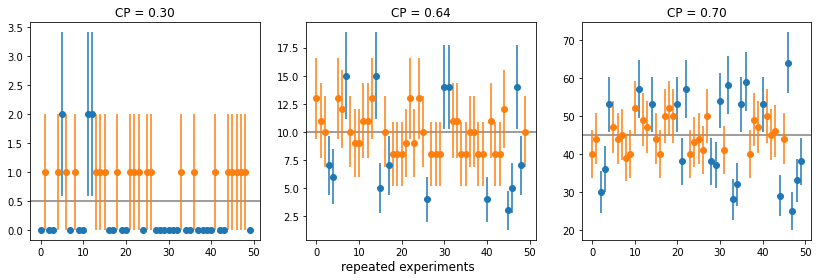

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

N = [0.5, 10., 45.]
K = 50

fig, ax = plt.subplots(1, len(N), sharex=True, figsize=(14, 4))
for Ni, axi in zip(N, ax):

    k = poisson(Ni).rvs(size=K, random_state=int(Ni))
    sigma_est = np.sqrt(k)
    
    axi.axhline(Ni, color="0.5", zorder=0)

    inside = np.abs(Ni - k) < sigma_est
    iexp = np.arange(K)
    for m, c in zip((~inside, inside), ("C0", "C1")):
        axi.errorbar(iexp[m], k[m], sigma_est[m], fmt="o", color=c)

    # compute coverage probability with very large number of repetitions
    k = poisson(Ni).rvs(size=100000, random_state=int(Ni))
    inside = np.abs(Ni - k) < np.sqrt(k)
    cov_prob = np.mean(inside)

    axi.set_title(f"CP = {cov_prob:.2f}")
fig.supxlabel("repeated experiments");

* Poisson interval $N \pm \sqrt{N}$ only has proper coverage for $N \gtrsim 45$
    * Reason: if $N$ fluctuates downwards, interval shrinks
* Intervals can be empty in some experiments; this is not ideal, but not a defect
* If you have an estimate $\mu$ for the true value of $N_i$, this is better: $N_i \pm \sqrt{\mu}$

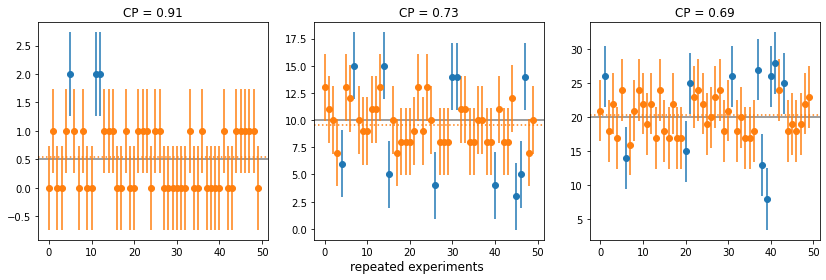

In [255]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

N = [0.5, 10, 20]
K = 50

fig, ax = plt.subplots(1, len(N), sharex=True, figsize=(14, 4))
for Ni, axi in zip(N, ax):
    k = poisson(Ni).rvs(size=K, random_state=int(Ni))

    # compute estimate for Ni
    N_est = np.mean(k)
    sigma_est = np.ones(len(k)) * np.sqrt(N_est)

    axi.axhline(Ni, color="0.5", zorder=0)
    axi.axhline(N_est, color="C1", ls=":", label="estimate")
    
    inside = np.abs(Ni - k) < sigma_est

    iexp = np.arange(K)

    for m, c in zip((~inside, inside), ("C0", "C1")):
        axi.errorbar(iexp[m], k[m], sigma_est[m], fmt="o", color=c)

    # compute coverage probability with very large number of repetitions
    k = poisson(Ni).rvs(size=1000000, random_state=1)
    inside = np.abs(Ni - k) < np.sqrt(np.mean(k))
    cov_prob = np.mean(inside)

    axi.set_title(f"CP = {cov_prob:.2f}")
fig.supxlabel("repeated experiments");

### Plug-in estimator

* Plug-in principle: replace true values in some formula with estimates, e.g.

$$
c = g(a, b, \dots) \to \hat c = g(\hat a, \hat b, \dots)
$$

* Justification (1D): for $N\to \infty$, $\Delta a = \hat a - a \to 0$ for any reasonable estimator, thus $g(\hat a) = g(a + \Delta a) = g(b) + O(\Delta a) \to g(b)$ for smooth $g$

* Example: $\sqrt{N}$ uncertainty estimator for Poisson-distributed count $N$
    * Variance of Poisson distribution of counts $N$: $V_N = \lambda$
    * Standard deviation is square-root of variance: $\sigma_N = \sqrt{V_N}$
    * Replace expected count $\lambda$ with observed count $N$: $\hat \sigma_N =  \sqrt{\hat V_N} = \sqrt{N}$
* Plug-in estimators are usually biased (**unless g is linear**) and may fail to give reasonable answers for very small samples
    * Extreme case: $\lambda = 0.01$, sample $N = 0 \to \sqrt{0} = 0 \neq 0.1$
* **Be aware** of potentially bias when you use plug-in estimator

### Maximum-likelihood estimator (MLE)

* MLE has attractive properties
    * For $N \to \infty$, as close to true value as possible (proven)
        * Unbiased and minimum variance
    * In finite samples
        * Biased in general, but bias zero or small for many important distributions
        * Probably as close to true value as possible (conjecture)
    * Easy to compute MLE **and its variance estimate** (with suitable software)
    * But: Not robust against outliers or model misspecification


* Maximum-likelihood estimator for parameter $a$
$$
\begin{aligned}
h_\text{MLE}[x] &= \text{argmax}_{a}\, \ln \mathcal L(a) \\
\ln \mathcal L(a) &:= \ln \prod_i dP(x_i; a) = \sum_i \ln dP(x_i; a) \\ &
= \sum_i \ln f(x_i; a) + \underbrace{\sum_i \ln dx}_{\text{const}} \\
&\equiv \sum_i \ln f(x_i; a)
\end{aligned}
$$
* MLE example: arithmetic mean is MLE for parameter $\mu$ of normal distribution
$$
\begin{aligned}
\frac\partial{\partial \mu} \sum_i \ln\left( \frac1{\sqrt{2\pi} \sigma} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2} \right)\right) &\overset{!}{=} 0 \\
\Rightarrow \underbrace{\frac\partial{\partial \mu} \sum_i \ln\left( \frac1{\sqrt{2\pi} \sigma} \right)}_{0} - \frac\partial{\partial \mu} \sum_i \frac{(x_i - \mu)^2}{2\sigma^2} &= 0\\
\sum_i \frac{x_i - \mu}{\sigma^2} &= 0 \\
\sum_i x_i - \sum_i\mu &= 0 \\
\Rightarrow \hat\mu = \frac 1 N \sum_i x_i &
\end{aligned}
$$
* In general: Use numerical optimiser (e.g. MINUIT) to find MLE for any distribution


#### Uncertainty of maximum likelihood estimate

* Two ways to compute uncertainty estimates for MLE based on theorems by Fisher and [Wilks](https://en.wikipedia.org/wiki/Wilks'_theorem)
    * Recommended: lecture on MLE by Geyer (2013) https://www.stat.umn.edu/geyer/5601/notes/sand.pdf

##### Variance estimate

* Variance estimate for MLE estimator $\hat a$ of parameter $a$
$$
\hat V[\hat a] = -\left(\frac{\partial^2 \ln \mathcal L(a)}{\partial a^2}\Bigg|_{a=\hat a}\right)^{-1}
$$
* Covariance estimate for multivariate MLE of parameter $\vec a$
$$
\hat C_{ik}[\hat{\vec a}] = -\left(\frac{\partial^2 \ln \mathcal L(\vec a)}{\partial a_i \partial a_k}\Bigg|_{\vec a=\hat {\vec a}}\right)^{-1}
$$
* MINUIT computes this numerically (HESSE method)


* Example: variance estimate for $\hat\mu$ for normally distributed data with known width $\sigma$
$$
-\left(\frac{\partial^2 \ln \mathcal L(\mu)}{\partial \mu^2}\right)^{-1} = \dots = \left(\frac{\partial^2}{\partial \mu^2} \sum_i \frac{(x_i - \mu)^2}{2\sigma^2}\right)^{-1} = -\left(\frac{\partial}{\partial \mu} \sum_i \frac{(x_i - \mu)}{\sigma^2}\right)^{-1} = \left(\sum_i \frac1{\sigma^2}\right)^{-1} = \frac{\sigma^2}{N}
$$
    * Well-known result: error on the mean is $\sqrt{\frac{\sigma^2}{N}} = \frac\sigma {\sqrt{N}}$

##### Profile likelihood scan

* Produces asymmetric uncertainty intervals in general
* For desired confidence level $CL$ (a probability) solve $\chi^2(\lambda;M) = CL$, where $M$ is number of parameters of interest (subset of all parameters)
* Solve for contour in $\vec a$ (parameters of interest) space
$$
- 2\ln \frac{\mathcal{L}(\vec a, \hat b(\vec a))}{\mathcal{L}(\hat {\vec a}, \hat{\vec b})} = \lambda
$$
where $\hat b(\vec a)$ are maximum-likelihood estimates of nuisance parameters $\vec b$ for fixed values of $\vec a$
* Too complicated? Don't worry, MINUIT computes all this numerically for you (MINOS method)
* Commonly used to draw uncertainty contours
* For a while, was advertised as superior to variance estimate, but isn't
    * [Does not produce better intervals in general](https://iminuit.readthedocs.io/en/stable/tutorial/hesse_and_minos.html)
    * Cannot combine asymmetric intervals/confidence regions from different experiments, see Roger's lecture (references at the end)
* If you really need this method, publish full likelihood function with tools like [pyhf](https://github.com/scikit-hep/pyhf) or [HistFactory](https://root.cern.ch/doc/master/group__HistFactory.html)

In [154]:
# Example: fit parameters of shifted Student's t distribution

import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from scipy.stats import t

nd = 3
mu = 1.0

sample = t(nd, mu).rvs(size=50, random_state=1)

def model(x, nd, mu):
    return t(nd, mu).pdf(x)

cost = UnbinnedNLL(sample, model)

m = Minuit(cost, nd=2, mu=0)
m.limits["nd"] = (1, None)
m.migrad()  # also runs equivalent of m.hesse() by default
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 165                        │              Nfcn = 131              │
│ EDM = 2.85e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ nd   │    3.6    │    1.5    │    -1.2    │    2.1     │    1    │         │       │
│ 1 │ mu   │   0.97    │   0.16    │   -0.16    │    0.16    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          nd           │          mu           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -1.2    │    2.1    │   -0.16   │   0.16    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────┐
│    │      nd      mu │
├────┼─────────────────┤
│ nd │    2.36 0.00743 │
│ mu │ 0.00743  0.0264 │
└────┴─────────────────┘

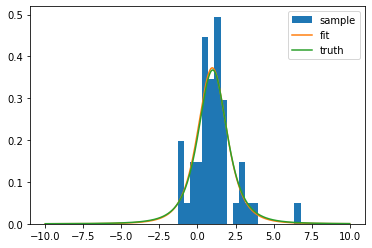

In [158]:
xm = np.linspace(-10, 10, 1000)
plt.hist(sample, bins=20, density=True, label="sample")
plt.plot(xm, t(*m.values).pdf(xm), label="fit")
plt.plot(xm, t(nd, mu).pdf(xm), label="truth")
plt.legend();

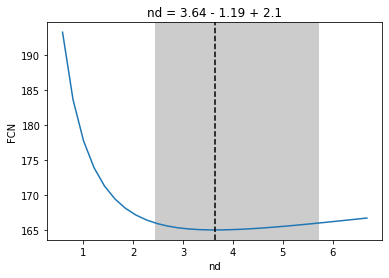

In [156]:
m.draw_mnprofile("nd");

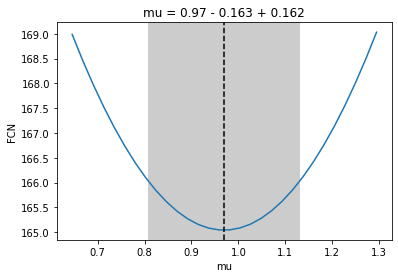

In [157]:
m.draw_mnprofile("mu");

##### Misspecified models

* Maximum-likelihood method assumes that model is correctly specified, all proven properties rely on that
* If model is misspecified (sample has different distribution)
    * MLE is biased in general
    * MLE uncertainties (from either method) no longer have coverage
* Fundamentalist: models are essentially always misspecified, since they are always approximations
* Pragmatist: Small deviations have negligible effect
* Examples of misspecified models
    * Assumed: signal only, actually: signal + background
    * Assumed: normal distribution, actually: distorted normal (wider tails, asymmetric, etc)
* Worse at HL-LHC: higher statistics -> more sensitive to small deviations
* Need goodness-of-fit criterion (not discussed) here to check whether model is reliable
* How to fix this: make model more general (by adding parameters) so it is no longer misspecified
    * Use Student's t (or double-sided Crystal Ball) instead of normal distribution to fit peak
    * Use polynomial of higher order for smooth background
    * ...

## Systematic uncertainties: Known unknowns

 [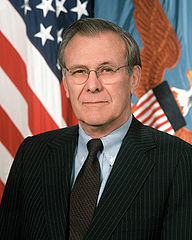](https://commons.wikimedia.org/w/index.php?curid=768473)
Donald Rumsfeld: "There are known knowns, things we know that we know; and there are known unknowns, things that we know we don't know. But there are also unknown unknowns, things we do not know we don't know."

* Why data analyses take so long: Study data, detector, and methods to turn **unknown unknowns** into **known knowns** or **known unknowns**


* No formal way, but generally
  * Apply **checks**
      * Split data by magnet polarity, fill, etc., analyse splits separately, check for agreement
  * Worry
      * What could go wrong?
      * What are my assumptions?
      * Example: You take an efficiency or correction factor from simulation, but simulation differs from real experiment; perform control measurement or use standard LHCb control measurements
  * Methods
      * If feasible, start from first principles or use methods that are known to be optimal/robust
      * Examples
          * Use Maximum-likelihood instead of least-squares fit
          * Use bootstrap estimate of error

* Guidelines for handling systematic errors
   * [Roger Barlow: Systematic Errors: Facts and Fictions (2002)](https://arxiv.org/pdf/hep-ex/0207026.pdf)
   * [Roger Barlow, "Practical Statistics for Particle Physics" (2019), Section 6.5 ](https://arxiv.org/pdf/1905.12362.pdf)


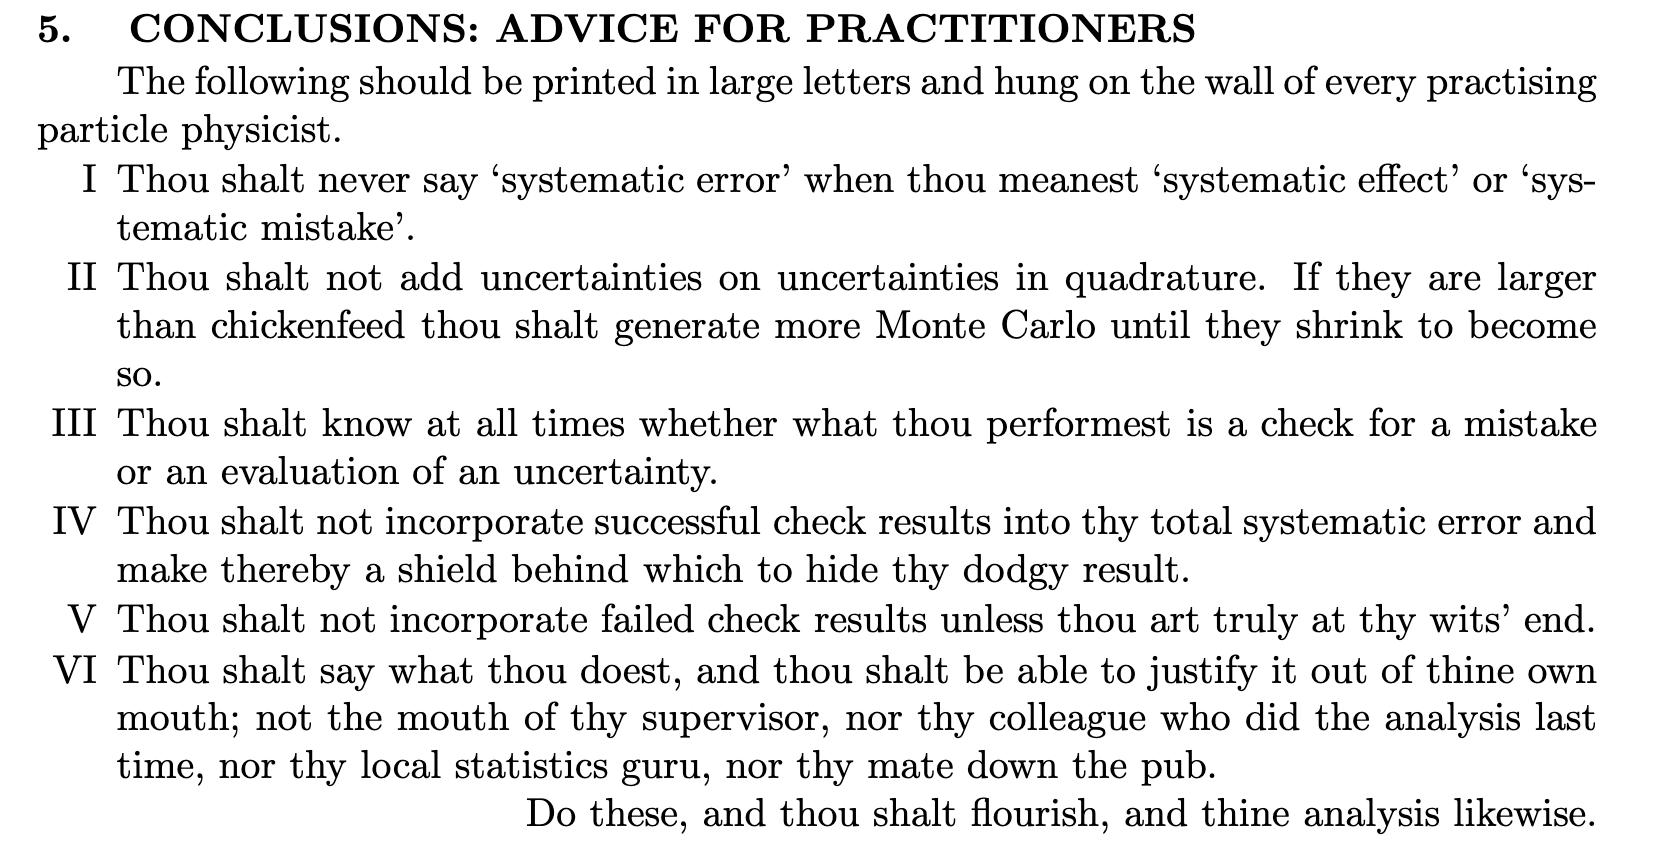

## Error propagation

* Arithmetic mean
$$
\hat \mu = \frac 1N\sum_i x_i
$$

* Variance of x (unbiased formula for unkown mean)
$$
\hat V[x] = \frac 1{N-1} \sum_i (x_i - \hat\mu)^2
$$

* Error on the mean
$$
\hat{V}[\hat \mu] = \frac1{N^2} \sum_i \hat{V}[x_i] = \frac1N \hat{V}[x] = \frac 1 {N(N - 1)}\sum_i (x_i - \hat \mu)^2
$$

## LHCb Statistics Guidelines

* [Living document on GitLab](https://gitlab.cern.ch/lhcb/statistics-guidelines/-/blob/master/main.md)

* Living document to collect information about best practices

* Index instead of a book
    * Brief items with advice
    * Links to literature

* In conversation, you can directly link to items, point to title and copy link (right-click menu)

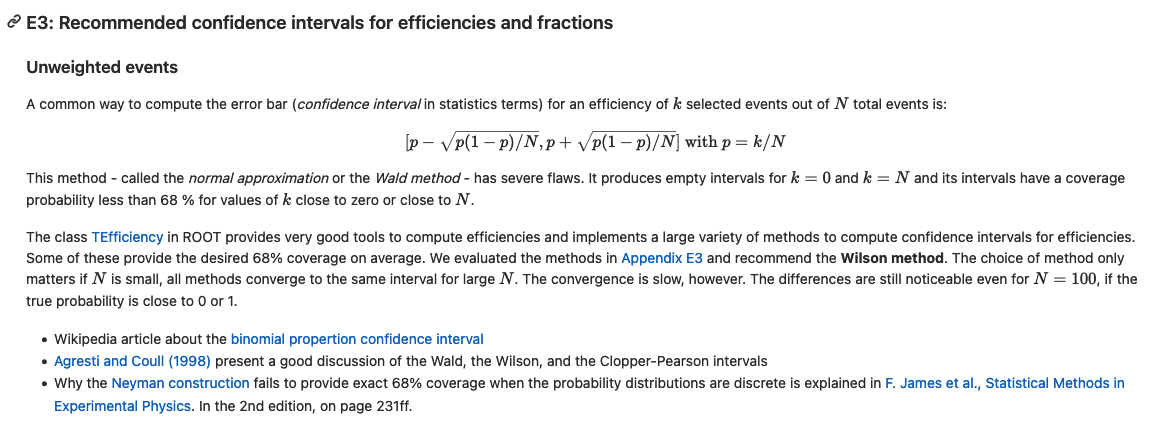

* Guidelines rely on your input: Request or propose new items 

## Introductory statistics books

* [List of books on TWiki pages of Statistis and Machine Learning WG](https://twiki.cern.ch/twiki/bin/viewauth/LHCbPhysics/LHCbStatistics)

* Books I personally learned from
    * "Statistical Data Analysis", Glen Cowan (Oxford University Press), 1998
    * "Statistical Methods in Experimental Physics",W T Eadie, Drijard, F James, M Roos, and B Sadoulet, American Elsevier, 1971
    * "An Introduction to the Bootstrap", B Efron, RJ Tibshirani, CRC Press, 1994

* Free books
    * ["Introduction to Statistics and Data Analysis for Physicists", Gerhard Bohm and Günter Zech, Verlag-DESY, 2010](http://www-library.desy.de/preparch/books/vstatmp_engl.pdf)
    * ["Statistische und numerische Methoden der Datenanalyse", V Blobel and E Lohrmann, Open Access ebook CC-BY 3.0, 2012](https://link.springer.com/content/pdf/10.1007%2F978-3-663-05690-4.pdf)